In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
%config Completer.use_jedi = False

In [2]:
house_data  = pd.read_csv("data/train.csv")
house_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

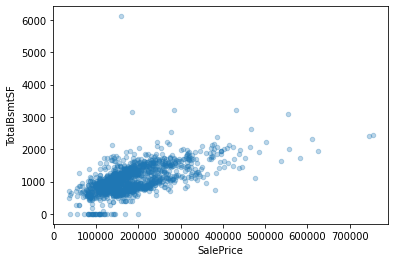

In [3]:
house_data.plot.scatter(x = "SalePrice", y = "TotalBsmtSF", alpha=0.3) 

In [8]:
house_data["TotalBsmtSF"].describe()

X_train = house_data["TotalBsmtSF"];

X_train.shape

y_train = house_data["SalePrice"];

X_train.shape, y_train

X_train = X_train
#house_data[["TotalBsmtSF", "SalePrice"]].head()

AttributeError: 'Series' object has no attribute 'reshape'

In [5]:
test_data = pd.read_csv("data/test.csv");
test_res_data = pd.read_csv("data/sample_submission.csv")

X_test = test_data["TotalBsmtSF"];
y_test = test_res_data["SalePrice"]
X_test = X_test.fillna(0)
#X_test.describe()
#X_test = X_test.dropna()
#X_test.isnull().sum()

X_test.describe(), y_test.describe()

(count    1459.000000
 mean     1045.400960
 std       443.592976
 min         0.000000
 25%       784.000000
 50%       988.000000
 75%      1304.000000
 max      5095.000000
 Name: TotalBsmtSF, dtype: float64,
 count      1459.000000
 mean     179183.918243
 std       16518.303051
 min      135751.318893
 25%      168703.011202
 50%      179208.665698
 75%      186789.409363
 max      281643.976117
 Name: SalePrice, dtype: float64)

In [6]:
y_test.isna().sum()

0

In [7]:
rg = linear_model.LinearRegression()

rg.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 856 1262  920 ... 1152 1078 1256].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
rg.score(X_test, y_test)
y = rg.predict(X_test)
y
#rg.score()

In [ ]:
plt.scatter(X_test["TotalBsmtSF"], y_test,  color='black')
plt.plot(X_test["TotalBsmtSF"], y, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y))